In [70]:
# Feature Construction
# Handling Categorical data

# Tasks:
# 1) Examining our dataset
# 2) Imputing categorical features
# 3) Encoding categorical variables
#    - Encoding Nominal Level
#    - Encoding Ordinal level
# 4) Extending numerical features
# 5) Text-specific feature construction

In [88]:
import pandas as pd

X = pd.DataFrame({'city' : ['tokyo', None, 'london', 'seattle', 'san fransisco', 'tokyo'],
                  'boolean' : ['yes', 'no', None, 'no', 'no', 'yes'],
                  'ordinal_column' : [None, 'like', 'somewhat like', 'like', 'somewhat like', 'dislike'],
                  'quantitative_column' : [1, 11, -.5, 10, None, 20]
                 })
X

,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,None,1.0
1,None,no,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,no,like,10.0
4,san fransisco,no,somewhat like,NaN
5,tokyo,yes,dislike,20.0


In [72]:
# 1) Examining our dataset
# Data - Qualitative(Categorical), Quantitative
# Data Level - Nominal, Ordinal, Interval, Ratio

# City                   Categorical    Nominal level
# boolean                Categorical    Nominal level
# ordinal_column         Categorical    Ordinal level
# quantitative_column    Quantitative   Ratio   level

In [73]:
# Examine missing values
# We can use Imputer to fill missing values as we've done for quantitative columns.
# Imputer does have a categorical option, most_frequent, however it only works on categorical data that has
# been encoded as integers.

X.isnull().sum()

city                   1
boolean                1
ordinal_column         0
quantitative_column    1
dtype: int64

In [ ]:
# Refer to https://www.wikiwand.com/en/Imputation_(statistics) for exhaustive methods of imputing
# Often a simple, if not always satisfactory, choice for missing values that are known not to be zero is 
# to use some central value of the variable. This is often the mean, median, or mode, and thus usually has 
# limited impact on the distribution.
# We choose to impute with :
#  - mean, if the variable is not skewed and normally distributed
#  - median, if the variable is skewed
#  - mode, if the variable is categorical

In [74]:
# 2) Imputing categorical features 'manually'
# Imputing City column - We fill 'most frequent' value for missing data (just as imputing 'mean' value for quantity column)

print("Most frequent value = {}".format(X['city'].value_counts().index[0]))

Most frequent value = tokyo


In [75]:
# Fill missing value in 'city' with most frequent value
X['city'].fillna(X['city'].value_counts().index[0])

0            tokyo
1            tokyo
2           london
3          seattle
4    san fransisco
5            tokyo
Name: city, dtype: object

In [76]:
# 2) Custom imputer for "categorical" attribute/column/feature

# Custom class for "category" imputing
from sklearn.base import TransformerMixin

class CustomCategoryImputer(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, df):
        X = df.copy()
        for col in self.cols:
            X[col].fillna(X[col].value_counts().index[0], inplace=True)
        return X
    
    def fit(self, *_):
        return self

cci = CustomCategoryImputer(cols=['city', 'boolean'])
cci.fit_transform(X)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,somewhat like,1.0
1,tokyo,no,like,11.0
2,london,no,somewhat like,-0.5
3,seattle,no,like,10.0
4,san fransisco,no,somewhat like,NaN
5,tokyo,yes,dislike,20.0


In [77]:
# 2) Custom imputer for "numeric" attribute/column/feature

# Custom class for "quantity" imputing
from sklearn.preprocessing import Imputer

class CustomQuantitativeImputer(TransformerMixin):
    # Actually strategy could be 'mean', 'median', or 'most_frequent' but as the function designed to handle
    # only quantitative columns, use 'mean' or 'median'
    def __init__(self, cols=None, strategy='mean'):
        self.cols = cols
        self.strategy = strategy
    
    def transform(self, df):
        x = df.copy()
        impute = Imputer(strategy = self.strategy)
        for col in self.cols:
            X[col] = impute.fit_transform(X[[col]])
        return X
    
    def fit(self, *_):
        return self

# strategy could be 'mean', 'median', or 'most_frequent'
cqi = CustomQuantitativeImputer(cols=['quantitative_column'], strategy='mean')
cqi.fit_transform(X)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,somewhat like,1.0
1,None,no,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,no,like,10.0
4,san fransisco,no,somewhat like,8.3
5,tokyo,yes,dislike,20.0


In [78]:
# Pipeline
# Let us combine imputing "category" and "quantity" using pipelines

from sklearn.pipeline import Pipeline

imputer = Pipeline([('quant', cqi), ('category', cci)])
imputer.fit_transform(X)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,somewhat like,1.0
1,tokyo,no,like,11.0
2,london,no,somewhat like,-0.5
3,seattle,no,like,10.0
4,san fransisco,no,somewhat like,8.3
5,tokyo,yes,dislike,20.0


In [79]:
# 3) Encoding categorical(Nominal) variables 'manually' using pandas

pd.get_dummies(X, columns = ['city', 'boolean'], prefix_sep = '__')

,ordinal_column,quantitative_column,city__london,city__san fransisco,city__seattle,city__tokyo,boolean__no,boolean__yes
0,somewhat like,1.0,0,0,0,1,0,1
1,like,11.0,0,0,0,0,1,0
2,somewhat like,-0.5,1,0,0,0,0,0
3,like,10.0,0,0,1,0,1,0
4,somewhat like,8.3,0,1,0,0,1,0
5,dislike,20.0,0,0,0,1,0,1


In [80]:
# 3) Encoding categorical(Nominal) variables using 'custom transformation'
#  Advantage of having this custom class is that we can use them in pipelines

class CustomDummifier(TransformerMixin):
    def __init__ (self, cols=None):
        self.cols = cols
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cols)
    
    def fit(self, *_):
        return self

cd = CustomDummifier(cols=['city', 'boolean'])
cd.fit_transform(X)

,ordinal_column,quantitative_column,city_london,city_san fransisco,city_seattle,city_tokyo,boolean_no,boolean_yes
0,somewhat like,1.0,0,0,0,1,0,1
1,like,11.0,0,0,0,0,1,0
2,somewhat like,-0.5,1,0,0,0,0,0
3,like,10.0,0,0,1,0,1,0
4,somewhat like,8.3,0,1,0,0,1,0
5,dislike,20.0,0,0,0,1,0,1


In [91]:
# 3) Encoding categorical(Ordinal) variables 'manually'
#    Note: As ordinal type has intrinsic order among its values, we don't create dummy variables; instead encode them 
#          to numerical values

ordering = [ None, 'dislike', 'somewhat like', 'like']

print(X['ordinal_column'], '\n')
print(X['ordinal_column'].map(lambda x: ordering.index(x)))

0             None
1             like
2    somewhat like
3             like
4    somewhat like
5          dislike
Name: ordinal_column, dtype: object 

0    0
1    3
2    2
3    3
4    2
5    1
Name: ordinal_column, dtype: int64


In [92]:
# 3) Encoding categorical variables using 'custom transformation' (label encoding)
#    Note: As ordinal type has intrinsic order among its values, we don't create dummy variables; instead encode them 
#          to numerical values

class CustomEncoder(TransformerMixin):
    def __init__(self, col, ordering=None):
        self.ordering = ordering
        self.col = col
        
    def transform(self, df):
        X = df.copy()
        X[self.col] = X[self.col].map(lambda x: self.ordering.index(x))
        return X
    
    def fit(self, *_):
        return self

ce = CustomEncoder(col = 'ordinal_column', ordering = [None, 'dislike', 'somewhat like', 'like'])
ce.fit_transform(X)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,0,1.0
1,None,no,3,11.0
2,london,None,2,-0.5
3,seattle,no,3,10.0
4,san fransisco,no,2,NaN
5,tokyo,yes,1,20.0


In [14]:
# Bucketing or Binning 'manually' (using cut) on quantitative, continuous variable into categorical, ordinal variable

# Transforms floating values into categorical bins divinding the range into equal intervals of bins
# To accommodate edge values the range is extended by 0.1% on either side

pd.cut(X['quantitative_column'], bins = 3)

0     (-0.52, 6.333]
1    (6.333, 13.167]
2     (-0.52, 6.333]
3    (6.333, 13.167]
4    (6.333, 13.167]
5     (13.167, 20.0]
Name: quantitative_column, dtype: category
Categories (3, interval[float64]): [(-0.52, 6.333] < (6.333, 13.167] < (13.167, 20.0]]

In [15]:
# Converts to integral buckets

pd.cut(X['quantitative_column'], bins = 3, labels=False)

0    0
1    1
2    0
3    1
4    1
5    2
Name: quantitative_column, dtype: int64

In [16]:
# Bucketing with the 'custom transformation' cutter so that it can be used in pipeline

class CustomCutter(TransformerMixin):
    def __init__(self, col, bins, labels=False):
        self.labels = labels
        self.bins = bins
        self.col = col
        
    def transform(self, df):
        X = df.copy()
        X[self.col] = pd.cut(X[self.col], bins=self.bins, labels=self.labels)
        return X
    
    def fit(self, *_):
        return self

cc = CustomCutter(col='quantitative_column', bins=3)
cc.fit_transform(X)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,somewhat like,0
1,None,no,like,1
2,london,None,somewhat like,0
3,seattle,no,like,1
4,san fransisco,no,somewhat like,1
5,tokyo,yes,dislike,2


In [17]:
# Create a final Pipeline using what we've done so far
# Dummy encoding - boolean, city
# Label encoding - ordinal_column
# Ordinal level data - quantitative_column

from sklearn.pipeline import Pipeline

pipe = Pipeline([('imputer', imputer), ('dummify', cd), ('encode', ce), ('cut', cc)])

In [18]:
print("Data before all transformations:")
X

Data before all transformations:


,city,boolean,ordinal_column,quantitative_column
0,tokyo,yes,somewhat like,1.0
1,None,no,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,no,like,10.0
4,san fransisco,no,somewhat like,8.3
5,tokyo,yes,dislike,20.0


In [19]:
pipe.fit(X)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
         steps=[('imputer',
                 Pipeline(memory=None,
                          steps=[('quant',
                                  <__main__.CustomQuantitativeImputer object at 0x0000025B32558630>),
                                 ('category',
                                  <__main__.CustomCategoryImputer object at 0x0000025B310DC710>)],
                          verbose=False)),
                ('dummify',
                 <__main__.CustomDummifier object at 0x0000025B3596D358>),
                ('encode',
                 <__main__.CustomEncoder object at 0x0000025B3598A978>),
                ('cut', <__main__.CustomCutter object at 0x0000025B34981898>)],
         verbose=False)

In [20]:
print("Data after all transformations:")
pipe.transform(X)

Data after all transformations:


C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,ordinal_column,quantitative_column,city_london,city_san fransisco,city_seattle,city_tokyo,boolean_no,boolean_yes
0,1,0,0,0,0,1,0,1
1,2,1,0,0,0,1,1,0
2,1,0,1,0,0,0,1,0
3,2,1,0,0,1,0,1,0
4,1,1,0,1,0,0,1,0
5,0,2,0,0,0,1,0,1


In [21]:
# 4) Extending numerical features

df = pd.read_csv('Data/1.csv', header = None)
df.columns = ['index', 'x', 'y', 'z', 'activity']
df.head()

,index,x,y,z,activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [22]:
df['activity'].value_counts(normalize=True)

7    0.515369
1    0.207242
4    0.165291
3    0.068793
5    0.019637
6    0.017951
2    0.005711
0    0.000006
Name: activity, dtype: float64

In [23]:
# NOT CLEAR the intention of introducing this

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X = df[['x', 'y', 'z']]
y = df['activity']

knn_params = {'n_neighbors': [3, 4, 5, 6]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X, y)

print (grid.best_score_, grid.best_params_)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.720752487676999 {'n_neighbors': 5}


In [24]:
# The library "PolynomialFeatures" helps extending original 3 features viz., x, y, z to 
#     9 features viz., x0, x1, x2, x0^2, x0.x1, x0.x2, x1^2, x1.x2, x2^2
# Note, new features viz., x0, x1, x2 are nothing but original features viz., x, y, z

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(162501, 9)

In [25]:
pd.DataFrame(X_poly, columns = poly.get_feature_names()).head()

,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1502.0,2215.0,2153.0,2256004.0,3326930.0,3233806.0,4906225.0,4768895.0,4635409.0
1,1667.0,2072.0,2047.0,2778889.0,3454024.0,3412349.0,4293184.0,4241384.0,4190209.0
2,1611.0,1957.0,1906.0,2595321.0,3152727.0,3070566.0,3829849.0,3730042.0,3632836.0
3,1601.0,1939.0,1831.0,2563201.0,3104339.0,2931431.0,3759721.0,3550309.0,3352561.0
4,1643.0,1965.0,1879.0,2699449.0,3228495.0,3087197.0,3861225.0,3692235.0,3530641.0


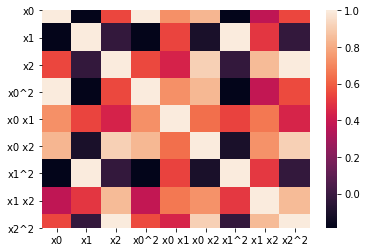

In [26]:
# Exploratory Data Analysis (EDA)
# Glance over the correlations among all 9 features

%matplotlib inline
import seaborn as sns

sns.heatmap(pd.DataFrame(X_poly, columns=poly.get_feature_names()).corr())

In [27]:
# Discard square term features

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)
X_poly.shape

(162501, 6)

In [28]:
# Glance over the correlations among all 6 features (discarding square term features)

pd.DataFrame(X_poly, columns=poly.get_feature_names()).head()

,x0,x1,x2,x0 x1,x0 x2,x1 x2
0,1502.0,2215.0,2153.0,3326930.0,3233806.0,4768895.0
1,1667.0,2072.0,2047.0,3454024.0,3412349.0,4241384.0
2,1611.0,1957.0,1906.0,3152727.0,3070566.0,3730042.0
3,1601.0,1939.0,1831.0,3104339.0,2931431.0,3550309.0
4,1643.0,1965.0,1879.0,3228495.0,3087197.0,3692235.0


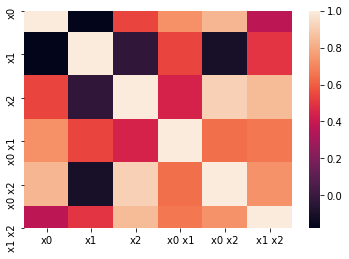

In [29]:
# Glance over the correlations among all 6 features (discarding square term features)

sns.heatmap(pd.DataFrame(X_poly, columns=poly.get_feature_names()).corr())

In [30]:
from sklearn.pipeline import Pipeline

pipe_params = {'poly_features__degree':[1, 2, 3], 
               'poly_features__interaction_only':[True, False], 
               'classify__n_neighbors':[3, 4, 5, 6]}

pipe = Pipeline([('poly_features', poly), ('classify', knn)])

grid = GridSearchCV(pipe, pipe_params)
grid.fit(X, y)

print (grid.best_score_, grid.best_params_)

C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\anand\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

In [ ]:
# 5) Text-specific feature construction
#    This part deals with longer form of text data 
#    (till now we've dealt with shorter text strings which is part of a category)

In [ ]:
# Corpus - An aggregate of text content or documents is called "Corpus".

# We transform a corpus into numerical representation through a process known as "vectorization" 
# using a "Bag of Words" method. A bag of words is a set of words along with thier count
# irrespective of its position, grammar, etc.
# A bag of words is created through
#    - Tokenizing: use white spaces, punctuation to separate words from each other called as tokens
#    - Counting: count no. of occurences
#    - Normalizing: tokens are weighed with diminishing importance when they occur in majority of documents

# Methods of vectorization:
#   - CountVectorizer
#   - Tf-idf Vectorizer


In [ ]:
# CountVectorizer - Convert text columns into matrices 
#                           a document-term matrix, as row represents document, column represents term
#                 - columns become tokens, cell values are counts of occurences

In [ ]:
tweets = pd.read_csv('Data/twitter_sentiment.csv', encoding='latin1')
tweets.head()

In [ ]:
# Remove unwanted ItemID

del tweets['ItemID']
tweets.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X = tweets['SentimentText']
y = tweets['Sentiment']

In [ ]:
vect = CountVectorizer()
_ = vect.fit_transform(X)
print (_.shape)

In [ ]:
# Example usage of stop_words paramenter to CountVectorizer
# Remove noise from features by eliminating the list of stop words 

vect = CountVectorizer(stop_words = 'english')
_ = vect.fit_transform(X)
print (_.shape)

In [ ]:
# Example usage of "min_df" paramenter to CountVectorizer
# This parameter is used to skim the number of features, by ignoring terms that have a document frequency
# lower than the given threshold or cut-off
# This is a method that is utilized to significantly reduce the number of features created

vect = CountVectorizer(min_df = 0.05)
_ = vect.fit_transform(X)
print (_.shape)

In [ ]:
# Example usage of "max_df" paramenter to CountVectorizer
# Only include words that occur at most 80%

vect = CountVectorizer(max_df = 0.80)
_ = vect.fit_transform(X)
print (_.shape)

In [ ]:
# Example usage of "ngram_range" paramenter to CountVectorizer
# This parameter takes in a tuple where the lower and upper boundary of the range of n-values 
# indicates the number of different n-grams to be extracted. 
# N-grams represent phrases, so a value of one would represent one token, however a value of two
# would represent two tokens together

vect = CountVectorizer(ngram_range=(1, 5))
_ = vect.fit_transform(X)
print (_.shape)

In [ ]:
# "analyzer" determines whether the feature should be made of word or character ngrams. "Word" is the default.

vect = CountVectorizer(analyzer='word')
_ = vect.fit_transform(X)
print (_.shape)

In [ ]:
# Stemming is a common natural language processing method that allows us
# to stem our vocabulary, or make it smaller by converting words to their
# roots. There is a natural language toolkit, known as NLTK, that has several
# packages that allow us to perform operations on text data. One such
# package is a stemmer

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

stemmer.stem('interesting')

In [ ]:
# define a function that accepts text and returns a list of lemmas
def word_tokenize(text, how = 'lemma'):
    words = text.split(' ')
    return [stemmer.stem(word) for word in words]

In [ ]:
word_tokenize("hello you are very interesting")

In [ ]:
vect = CountVectorizer(analyzer = word_tokenize)
_ = vect.fit_transform(X)
print(_.shape)

In [ ]:
# - Tf-idf Vectorizer
# A Tf-idfVectorizer can be broken down into two components. First, the tf
# part, which represents term frequency, and the idf part, meaning inverse
# document frequency. It is a term—weighting method that has
# applications in information—retrieval and clustering

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Get null accuracy
y.value_counts(normalize=True)

In [ ]:
# set pipeline parameters
pipe_params = {'vect__ngram_range':[(1, 1), (1, 2)], 'vect__max_features':[1000, 10000], 'vect__stop_words':[None, 'english']}

pipe = Pipeline([('vect', CountVectorizer()), ('classify', MultinomialNB())])

grid = GridSearchCV(pipe, pipe_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

In [ ]:
# The scikit-learn has a FeatureUnion module that facilitates horizontal stacking of features (side-by-side). 
# This allows us to use multiple types of text featurizers in the same pipeline
# Other articles on internet 
#    - https://michelleful.github.io/code-blog/2015/06/20/pipelines/
#    - http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html

from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer

featurizer = FeatureUnion([('tfidf_vect', TfidfVectorizer()), ('count_vect', CountVectorizer())])

_ = featurizer.fit_transform(X)
print(_.shape)

In [ ]:
featurizer.set_params(tfidf_vect__max_features=100, count_vect__ngram_range=(1, 2), count_vect__max_features=300)
_ = featurizer.fit_transform(X)
print(_.shape)

In [ ]:
pipe_params = {'featurizer__count_vect__ngram_range':[(1, 1), (1, 2)], 'featurizer__count_vect__max_features':[1000, 10000], 'featurizer__count_vect__stop_words':[None, 'english'],
               'featurizer__tfidf_vect__ngram_range':[(1, 1), (1, 2)], 'featurizer__tfidf_vect__max_features':[1000, 10000], 'featurizer__tfidf_vect__stop_words':[None, 'english']}


pipe = Pipeline([('featurizer', featurizer), ('classify', MultinomialNB())])

grid = GridSearchCV(pipe, pipe_params)
grid.fit(X, y)

print (grid.best_score_, grid.best_params_)

In [ ]:
# End of "Feature Construction"